In [1]:
import numpy as np
import tensorflow as tf
import matplotlib as mpl
import pandas as pd
import gensim as gs
import sklearn.metrics.pairwise as skpairwise
import gensim.downloader as gdownloader
from matplotlib import pyplot as plt
from typing import List, Tuple, Dict

In [2]:
tf.config.set_visible_devices([tf.config.list_physical_devices('CPU')[0]])

In [3]:
x_train: np.ndarray = None
x_test: np.ndarray = None
y_train: np.ndarray = None
y_test: np.ndarray = None
(x_train, y_train), (x_test, y_test) = (
    tf.keras.datasets.cifar100.load_data(label_mode="fine"))

In [4]:
print(f"Train images shape: {x_train.shape}")
print(f"Train fine labels shape: {y_train.shape}")
print(f"Test images shape: {x_test.shape}")
print(f"Test fine labels shape: {y_test.shape}")

Train images shape: (50000, 32, 32, 3)
Train fine labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test fine labels shape: (10000, 1)


In [5]:
print(np.unique(np.append(y_train, y_test)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [6]:
fine_labels: List[str] = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver',
    'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl',
    'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can',
    'castle', 'caterpillar', 'cattle', 'chair',
    'chimpanzee', 'clock', 'cloud', 'cockroach',
    'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox',
    'girl', 'hamster', 'house', 'kangaroo',
    'computer_keyboard', 'lamp', 'lawn_mower',
    'leopard', 'lion', 'lizard', 'lobster', 'man',
    'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
    'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy',
    'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road',
    'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel',
    'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank',
    'telephone', 'television', 'tiger', 'tractor', 'train',
    'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
    'willow_tree', 'wolf', 'woman', 'worm'
]

In [7]:
y_train_str: np.ndarray = np.array(list(map(lambda x: np.array(
    [fine_labels[x[0]]]), y_train)))
y_test_str: np.ndarray = np.array(list(map(lambda x: np.array(
    [fine_labels[x[0]]]), y_test)))

print(f"Train fine labels strings shape: {y_train_str.shape}\n")
print(f"Test fine labels strings shape: {y_test_str.shape}\n")
print("All the fine labels strings values from the arrays:"
      f"\n{np.unique(np.append(y_train_str, y_test_str))}")

Train fine labels strings shape: (50000, 1)

Test fine labels strings shape: (10000, 1)

All the fine labels strings values from the arrays:
['apple' 'aquarium_fish' 'baby' 'bear' 'beaver' 'bed' 'bee' 'beetle'
 'bicycle' 'bottle' 'bowl' 'boy' 'bridge' 'bus' 'butterfly' 'camel' 'can'
 'castle' 'caterpillar' 'cattle' 'chair' 'chimpanzee' 'clock' 'cloud'
 'cockroach' 'computer_keyboard' 'couch' 'crab' 'crocodile' 'cup'
 'dinosaur' 'dolphin' 'elephant' 'flatfish' 'forest' 'fox' 'girl'
 'hamster' 'house' 'kangaroo' 'lamp' 'lawn_mower' 'leopard' 'lion'
 'lizard' 'lobster' 'man' 'maple_tree' 'motorcycle' 'mountain' 'mouse'
 'mushroom' 'oak_tree' 'orange' 'orchid' 'otter' 'palm_tree' 'pear'
 'pickup_truck' 'pine_tree' 'plain' 'plate' 'poppy' 'porcupine' 'possum'
 'rabbit' 'raccoon' 'ray' 'road' 'rocket' 'rose' 'sea' 'seal' 'shark'
 'shrew' 'skunk' 'skyscraper' 'snail' 'snake' 'spider' 'squirrel'
 'streetcar' 'sunflower' 'sweet_pepper' 'table' 'tank' 'telephone'
 'television' 'tiger' 'tractor' 

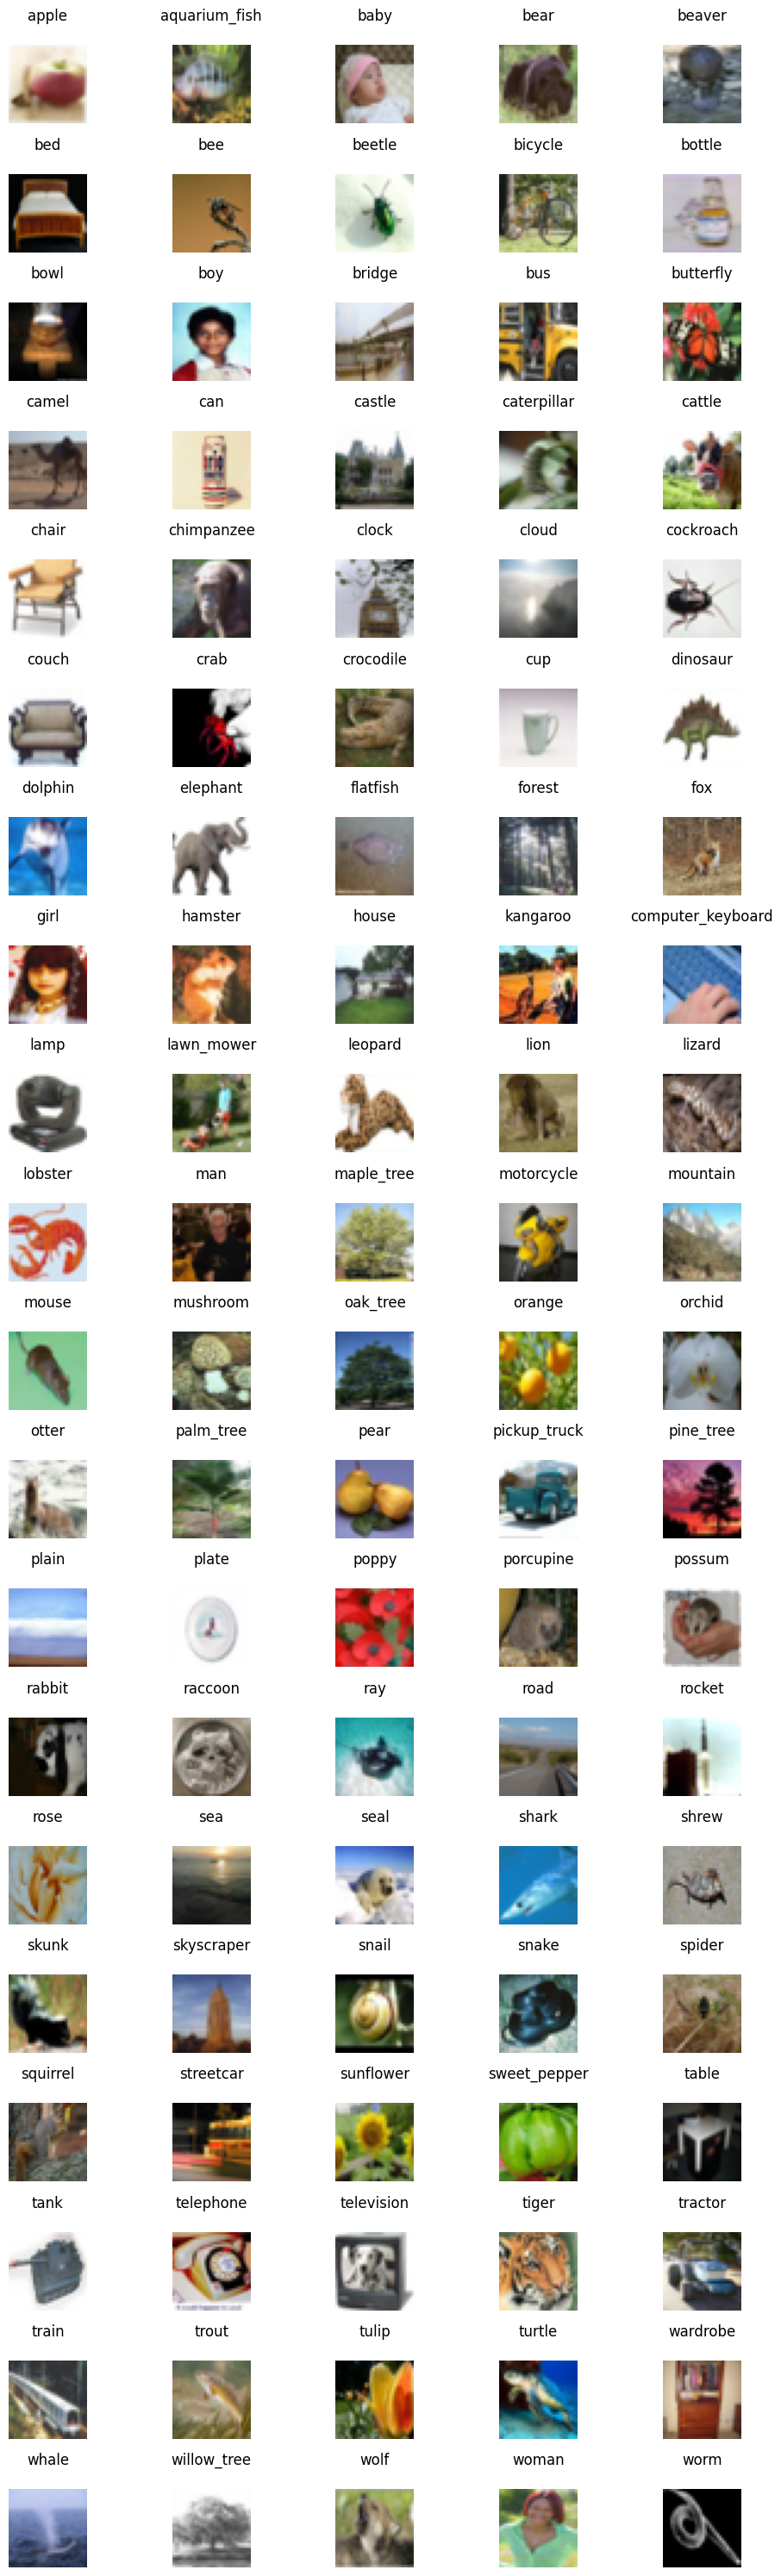

In [8]:
# create figure
fig: mpl.figure.Figure = None
ax: mpl.axes.Axes = None
fig, ax = plt.subplots(nrows=20, ncols=5, figsize=(10, 30))

i: int = 0  # i runs from 0 to (nrows*ncols-1) = 99
axi: mpl.axes.Axes = None  # axi is equivalent with ax[rowid][colid]

# for each fine label add an image to plot
for i, axi in enumerate(ax.flat):
    # get first index of image with with fine label i
    index: int = np.where(y_train.reshape(y_train.shape[0]) == i)[0][0]
    # get first image with fine label i
    img: np.ndarray = x_train[index]
    # add image to subplot
    axi.imshow(img)
    # remove axis from image
    axi.axis('off')
    # write title of image
    axi.set_title(f"{y_train_str[index][0]}\n")

fig.tight_layout()
plt.show()

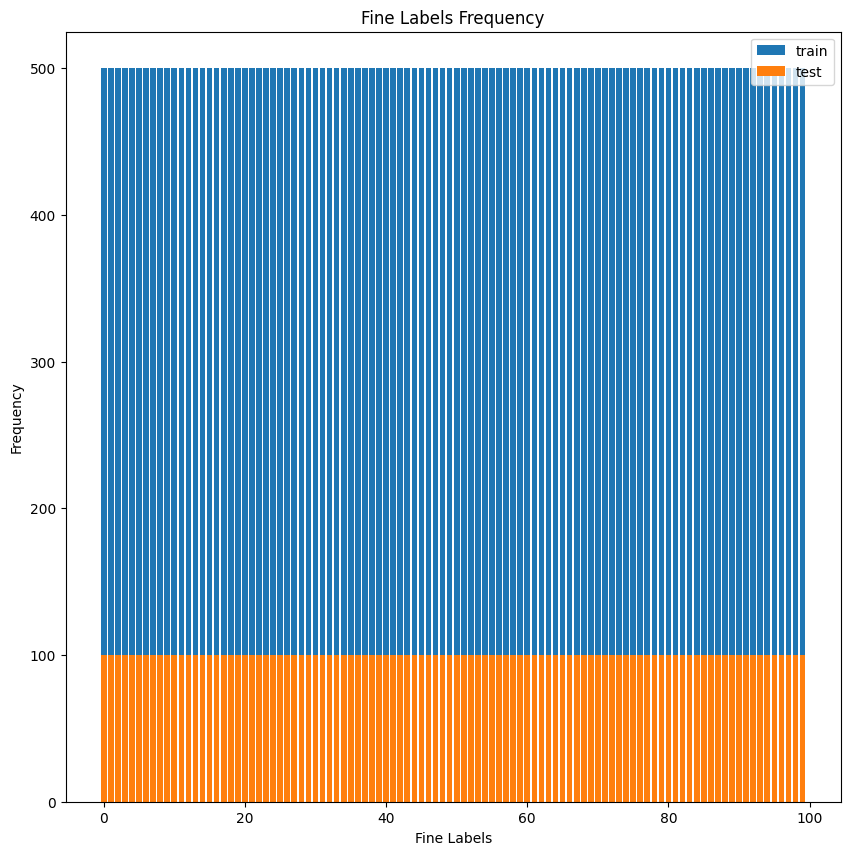

In [9]:
unique: np.ndarray = None
counts: int = 0

plt.figure(figsize=(10, 10))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, label='train')
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts, label='test')

plt.title('Fine Labels Frequency')
plt.xlabel('Fine Labels')
plt.ylabel('Frequency')

plt.legend()
plt.show()
     

In [10]:
fast_text_vectors: gs.models.keyedvectors = gdownloader.load(
    "fasttext-wiki-news-subwords-300")

In [11]:
fine_labels_words: List[List[str]] = list(
    map(tf.keras.preprocessing.text.text_to_word_sequence, fine_labels))

word_list: List[str] = None
for word_list in fine_labels_words:
    print(word_list)

['apple']
['aquarium', 'fish']
['baby']
['bear']
['beaver']
['bed']
['bee']
['beetle']
['bicycle']
['bottle']
['bowl']
['boy']
['bridge']
['bus']
['butterfly']
['camel']
['can']
['castle']
['caterpillar']
['cattle']
['chair']
['chimpanzee']
['clock']
['cloud']
['cockroach']
['couch']
['crab']
['crocodile']
['cup']
['dinosaur']
['dolphin']
['elephant']
['flatfish']
['forest']
['fox']
['girl']
['hamster']
['house']
['kangaroo']
['computer', 'keyboard']
['lamp']
['lawn', 'mower']
['leopard']
['lion']
['lizard']
['lobster']
['man']
['maple', 'tree']
['motorcycle']
['mountain']
['mouse']
['mushroom']
['oak', 'tree']
['orange']
['orchid']
['otter']
['palm', 'tree']
['pear']
['pickup', 'truck']
['pine', 'tree']
['plain']
['plate']
['poppy']
['porcupine']
['possum']
['rabbit']
['raccoon']
['ray']
['road']
['rocket']
['rose']
['sea']
['seal']
['shark']
['shrew']
['skunk']
['skyscraper']
['snail']
['snake']
['spider']
['squirrel']
['streetcar']
['sunflower']
['sweet', 'pepper']
['table']
['tank'

In [12]:
word_list: List[str] = None
word: str = ''
for word_list in fine_labels_words:
    for word in word_list:
        try:
            fast_text_vectors.word_vec(word)
        except Exception as err:
            print(f"-----{word} isn't in corpus----")

/var/folders/wb/y2gpsdqj3lv4dxr8s3llnff00000gn/T/ipykernel_2028/1129520586.py:6: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  fast_text_vectors.word_vec(word)


In [13]:
def word_list_to_avg_vector(lst: List[str]) -> np.ndarray:
    """
    Transform a word list to its average vector
    Parameters:
        lst (List[str]): string to transform to vector
    Returns:
        np.ndarray: vector representation of word list
    """
    # create empty array
    vec: np.ndarray = np.array([0.0] * 300)

    word: str = ''
    for word in lst:
        # add word vector to sentence vectors or zero if no word vector
        vec += fast_text_vectors.word_vec(word)

    # return average vector (take sentence length into consideration)
    return vec / len(lst)


fine_labels_vecs = np.asarray(list(
    map(word_list_to_avg_vector, fine_labels_words)))

print(f"fine labels vectors shape: {fine_labels_vecs.shape}")

fine labels vectors shape: (100, 300)


/var/folders/wb/y2gpsdqj3lv4dxr8s3llnff00000gn/T/ipykernel_2028/2881441559.py:15: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  vec += fast_text_vectors.word_vec(word)


In [14]:
# calculate cosine similarity between each two labels
similarity_matrix: np.ndarray = skpairwise.cosine_similarity(
    fine_labels_vecs, fine_labels_vecs)

# get only lower triangle
similarity_matrix: np.ndarray = np.tril(similarity_matrix, -1)

# get indexes with cosine similarity greater than 0.65
indexes: np.ndarray = np.argwhere(similarity_matrix > 0.65)

# create dataframe for better printing
fine_labels_high_similarity: pd.DataFrame = pd.DataFrame(
    {'Fine Label 1': [fine_labels[i[0]] for i in indexes],
     'Fine Label 2':  [fine_labels[i[1]] for i in indexes],
     'cosine similarity': [similarity_matrix[i[0], i[1]] for i in indexes]
     }
)

print("Fine labels with high cosine"
      "similarity and the cosine similarity value:\n"
      f"{fine_labels_high_similarity}")

Fine labels with high cosinesimilarity and the cosine similarity value:
   Fine Label 1   Fine Label 2  cosine similarity
0   caterpillar         beetle           0.669192
1      flatfish  aquarium_fish           0.677935
2          girl            boy           0.877364
3          lion       elephant           0.674919
4          lion        leopard           0.658242
5       lobster  aquarium_fish           0.657508
6       lobster           crab           0.755076
7           man            boy           0.674776
8    motorcycle        bicycle           0.769175
9      oak_tree     maple_tree           0.859224
10    palm_tree     maple_tree           0.815535
11    palm_tree       oak_tree           0.781855
12         pear          apple           0.689759
13    pine_tree         forest           0.705450
14    pine_tree     maple_tree           0.882768
15    pine_tree       oak_tree           0.881114
16    pine_tree      palm_tree           0.831227
17        snake      crocodi

In [15]:
fine_id_to_coarse_id: Dict[int, int] = {
    0: 4, 1: 1, 2: 14, 3: 8, 4: 0, 5: 6, 6: 7, 7: 7, 8: 18, 9: 3, 10: 3,
    11: 14, 12: 9, 13: 18, 14: 7, 15: 11, 16: 3, 17: 9, 18: 7, 19: 11,
    20: 6, 21: 11, 22: 5, 23: 10, 24: 7, 25: 6, 26: 13, 27: 15, 28: 3,
    29: 15, 30: 0, 31: 11, 32: 1, 33: 10, 34: 12, 35: 14, 36: 16, 37: 9,
    38: 11, 39: 5, 40: 5, 41: 19, 42: 8, 43: 8, 44: 15, 45: 13, 46: 14,
    47: 17, 48: 18, 49: 10, 50: 16, 51: 4, 52: 17, 53: 4, 54: 2, 55: 0,
    56: 17, 57: 4, 58: 18, 59: 17, 60: 10, 61: 3, 62: 2, 63: 12, 64: 12,
    65: 16, 66: 12, 67: 1, 68: 9, 69: 19, 70: 2, 71: 10, 72: 0, 73: 1,
    74: 16, 75: 12, 76: 9, 77: 13, 78: 15, 79: 13, 80: 16, 81: 19,
    82: 2, 83: 4, 84: 6, 85: 19, 86: 5, 87: 5, 88: 8, 89: 19, 90: 18,
    91: 1, 92: 2, 93: 15, 94: 6, 95: 0, 96: 17, 97: 8, 98: 14, 99: 13
}

# get indexes with cosine similarity greater than 0.6
indexes: np.ndarray = np.argwhere(similarity_matrix > 0.65)

# remove all indexes with same coarse label
indexes: np.ndarray = np.asarray(list(
    filter(lambda x: fine_id_to_coarse_id[x[0]] !=
           fine_id_to_coarse_id[x[1]], indexes)))

# create dataframe for better printing
fine_labels_high_similarity: pd.DataFrame = pd.DataFrame(
    {'Fine Label 1': [fine_labels[i[0]] for i in indexes],
     'Fine Label 2':  [fine_labels[i[1]] for i in indexes],
     'cosine similarity': [similarity_matrix[i[0], i[1]] for i in indexes]
     }
)

print("Fine labels with high cosine"
      "similarity and the cosine similarity value:\n"
      f"{fine_labels_high_similarity}")
     

Fine labels with high cosinesimilarity and the cosine similarity value:
   Fine Label 1   Fine Label 2  cosine similarity
0          lion       elephant           0.674919
1       lobster  aquarium_fish           0.657508
2     pine_tree         forest           0.705450
3        spider    caterpillar           0.667407
4        spider          snake           0.677436
5      squirrel      porcupine           0.666970
6      squirrel        raccoon           0.683283
7         tiger      crocodile           0.663161
8         tiger       elephant           0.716210
9       tractor   pickup_truck           0.658884
10        whale          shark           0.672718


In [16]:
y_train_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_train])
y_train_vecs: np.ndarray = y_train_vecs.reshape((50000, 300))
y_test_vecs: np.ndarray = np.asarray(
    [fine_labels_vecs[label] for label in y_test])
y_test_vecs: np.ndarray = y_test_vecs.reshape((10000, 300))

print(f"Train fine labels vectors shape: {y_train_vecs.shape}")
print(f"Test fine labels vectors shape: {y_test_vecs.shape}")

Train fine labels vectors shape: (50000, 300)
Test fine labels vectors shape: (10000, 300)


In [17]:
input_train: np.ndarray = tf.keras.applications.vgg19.preprocess_input(x_train)
input_test: np.ndarray = tf.keras.applications.vgg19.preprocess_input(x_test)
     

In [18]:
# create base model = vgg19
base_model: tf.keras.Model = tf.keras.applications.VGG19(
    weights='imagenet', include_top=False, 
    input_shape=(32, 32, 3), pooling='max')
# freeze the base_model so it will not train
base_model.trainable = False
# create new model
model: tf.keras.Model = tf.keras.models.Sequential()
# add input layer
model.add(tf.keras.Input(shape=(32,32,3)))
# add augmentation layers
model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
# add base model
model.add(base_model)
# add new layers to train
model.add(tf.keras.layers.Dense(448, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(384, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(300))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 32, 32, 3)         0         
                                                                 
 random_rotation (RandomRot  (None, 32, 32, 3)         0         
 ation)                                                          
                                                                 
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 dense (Dense)               (None, 448)               229824    
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 384)               172416    
                                                        

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.CosineSimilarity(axis=1))

In [24]:
es: tf.keras.callbacks.EarlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", min_delta=0.01, patience=3, mode="min",
    restore_best_weights=True)
history: tf.keras.callbacks.History = model.fit(
    input_train, y_train_vecs, epochs=20, shuffle=True, 
    batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/20
1250/1250 [==============================] - 107s 86ms/step - loss: -0.7247 - val_loss: -0.7368
Epoch 2/20
1250/1250 [==============================] - 106s 85ms/step - loss: -0.7312 - val_loss: -0.7408
Epoch 3/20
1250/1250 [==============================] - 106s 84ms/step - loss: -0.7363 - val_loss: -0.7436
Epoch 4/20
1250/1250 [==============================] - 105s 84ms/step - loss: -0.7407 - val_loss: -0.7456


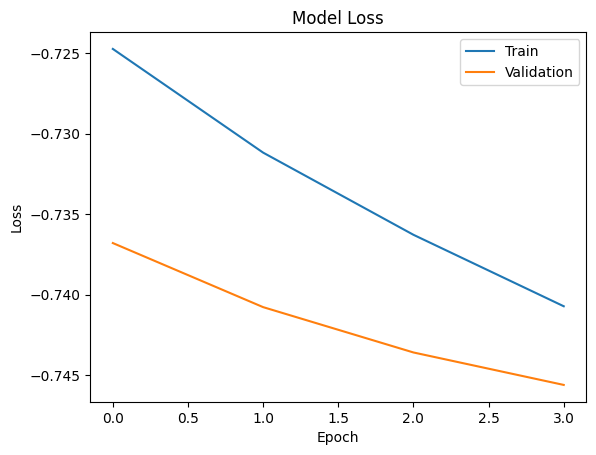

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [26]:
model_eval: float = model.evaluate(input_test, y_test_vecs) 
print(f"Model loss {model_eval}")

313/313 [==============================] - 20s 65ms/step - loss: -0.7385
Model loss -0.7384777069091797


1/1 [==============================] - 0s 77ms/step


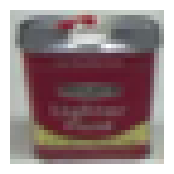

Actual label for image: can
Prediction for image: can, could, cannot, should, will
Prediction cosine similarity to real label: 0.97

1/1 [==============================] - 0s 38ms/step


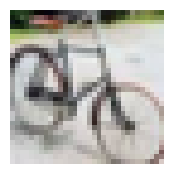

Actual label for image: bicycle
Prediction for image: bicycle, bike, bicyle, motorcycle, motor-bike
Prediction cosine similarity to real label: 0.88

1/1 [==============================] - 0s 33ms/step


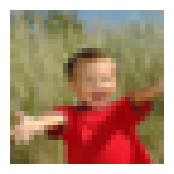

Actual label for image: boy
Prediction for image: girl, boy, woman, man, boytoy
Prediction cosine similarity to real label: 0.87

1/1 [==============================] - 0s 28ms/step


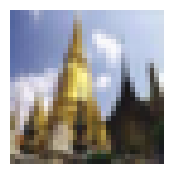

Actual label for image: castle
Prediction for image: rocket, tower, bridge, zipwire, flybridge
Prediction cosine similarity to real label: 0.66

1/1 [==============================] - 0s 30ms/step


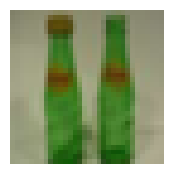

Actual label for image: bottle
Prediction for image: bottle, bottles, water-bottle, flask, half-bottle
Prediction cosine similarity to real label: 0.97

1/1 [==============================] - 0s 38ms/step


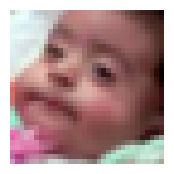

Actual label for image: baby
Prediction for image: girl, boy, baby, woman, boytoy
Prediction cosine similarity to real label: 0.84

1/1 [==============================] - 0s 30ms/step


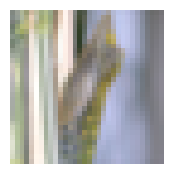

Actual label for image: caterpillar
Prediction for image: caterpillar, spider, woodlouse, caterpillar-like, butterfly
Prediction cosine similarity to real label: 0.81

1/1 [==============================] - 0s 26ms/step


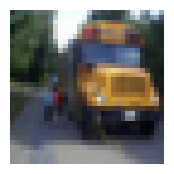

Actual label for image: bus
Prediction for image: bus, truck, bus-train, car, streetcar
Prediction cosine similarity to real label: 0.85

1/1 [==============================] - 0s 32ms/step


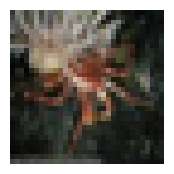

Actual label for image: crab
Prediction for image: crab, woodlouse, lobster, blobfish, leatherjacket
Prediction cosine similarity to real label: 0.82

1/1 [==============================] - 0s 85ms/step


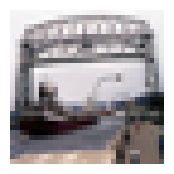

Actual label for image: bridge
Prediction for image: bus, bus-train, streetcar, trolley, tram
Prediction cosine similarity to real label: 0.74

1/1 [==============================] - 0s 52ms/step


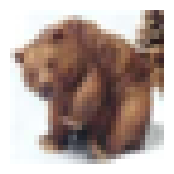

Actual label for image: bear
Prediction for image: rabbit, racoon, animal, squirrel, monkey
Prediction cosine similarity to real label: 0.6



In [27]:
images_index: List[int] = [25, 27, 37, 49, 52, 54, 91,
                           94, 100, 190, 396]

index: int = 0
for index in images_index:
    # get image
    img: np.ndarray = x_test[index].copy()

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(img), axis=0))

    # get label id
    id: int = y_test[index][0]

    # get label
    label: str = fine_labels[id]
    
    # get label vector
    vec: np.ndarray = fine_labels_vecs[id]

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

    # display image
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # print actual label
    print(f"Actual label for image: {label}")

    # print the predictions for image
    print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")
    
    # print prediction similarity to actual class
    print("Prediction cosine similarity to real label: "
    f"{round(skpairwise.cosine_similarity(prediction, [vec])[0][0], 2)}\n")

1/1 [==============================] - 0s 24ms/step


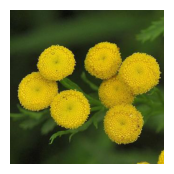

Prediction for image: orange, purple, pink, yellow, tangerine
1/1 [==============================] - 0s 47ms/step


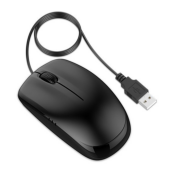

Prediction for image: telephone, phone, telephones, telephon, satphone
1/1 [==============================] - 0s 45ms/step


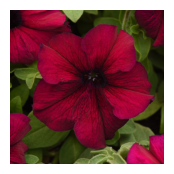

Prediction for image: rose, flower, orchid, tulip, carnation
1/1 [==============================] - 0s 36ms/step


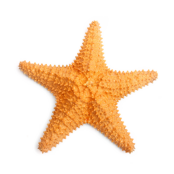

Prediction for image: woodlouse, lizard, dinosaur, blobfish, frog
1/1 [==============================] - 0s 31ms/step


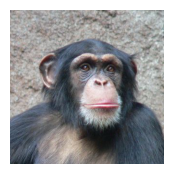

Prediction for image: chimpanzee, monkey, squirrel, chimp, porcupine
1/1 [==============================] - 0s 37ms/step


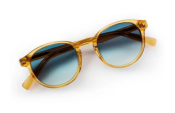

Prediction for image: woodlouse, snake, dogface, leatherjacket, twiglet
1/1 [==============================] - 0s 42ms/step


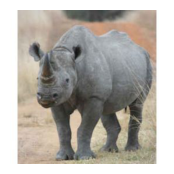

Prediction for image: tiger, lion, leopard, elephant, wolf
1/1 [==============================] - 0s 48ms/step


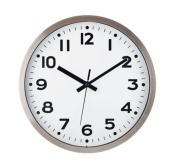

Prediction for image: clock, clock-face, clock-, clocks, clockface
1/1 [==============================] - 0s 53ms/step


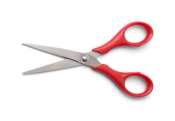

Prediction for image: flowerpot, woodlouse, cark, lawn-mower, lawnmower
1/1 [==============================] - 0s 41ms/step


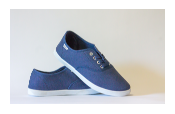

Prediction for image: motorcycle, bicycle, bike, lawnmower, lawn-mower
1/1 [==============================] - 0s 14ms/step


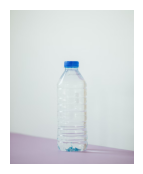

Prediction for image: bottle, cupper, cup, lamp, half-glass


In [30]:
images_paths: List[str] = [
                './demo_images/tansy.jpg',
                './demo_images/computer_mouse.jpg',
                './demo_images/petunia.jpg',
                './demo_images/starfish.jpg',
                './demo_images/chimpanzee.jpg',
                './demo_images/goggles.jpg',
                './demo_images/rhino.jpg',
                './demo_images/clock_1.jpg',
                './demo_images/scissor_1.jpg',
                './demo_images/shoes_1.jpg',
                './demo_images/bottle_1.jpg'
]

img_path: str = ''
for img_path in images_paths:
    img: np.ndarray = np.asarray(tf.keras.preprocessing.image.load_img(
        img_path))

    # get prediction vector
    prediction: np.ndarray = model.predict(np.expand_dims(
        tf.keras.applications.vgg19.preprocess_input(tf.image.resize(
            img, (32, 32))), axis=0))

    # get top-n labels by cosine similarity
    most_similar: List[str] = fast_text_vectors.similar_by_vector(
        prediction[0], topn=5)

    # display image
    plt.figure(figsize=(2,2))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # print the predictions for image
    print(f"Prediction for image: {', '.join([x[0] for x in most_similar])}")